# Exo de Classe (Bank Exited)

## Importation des packages et Modules

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split,learning_curve, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
sns.set()

## 1 - Chargement du Dataset

In [31]:
df = pd.read_csv('bank.csv', sep=';',na_values='Unknown')

In [32]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [33]:
data = df.copy()

# 2 - Prétraitement du Dataset

* Suppression des Valeurs Manquante

In [34]:
data = data.drop(['CLIENTNUM'],axis=1)
data = data.dropna(axis=0)

* Encodage des variables Qualitative Nominale et Qualitative Ordinale

- Variable Qualitative Nominale

In [35]:
df_quanti = data.select_dtypes(exclude=object)
df_quali_nom = data.select_dtypes(exclude=['int64','float64']).drop(['Income_Category','Education_Level','Card_Category','Attrition_Flag'],axis=1)
df_quali_nom = pd.get_dummies(df_quali_nom,drop_first=True)

- Variable Qualitative Ordinale

In [36]:
#Encodage des variable qualitative ordinale
data['Card_Category'] = data['Card_Category'].replace(['Blue','Silver','Gold','Platinum'],[0,1,2,3])

data['Income_Category'] = \
    data['Income_Category'].\
    replace(['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +'],\
    [0,1,2,3,4])

data['Education_Level'] = \
    data['Education_Level'].\
    replace(['Graduate','High School','Uneducated','College','Post-Graduate','Doctorate'],\
    [3,2,0,1,4,5])

- Variable Cible

In [37]:
# Encodage de la variable cible
data['Attrition_Flag'] = data['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[1,0])

- Normalisation des variable Quantitative et Traitement des Valeurs Aberrantes

* Traitement des Valeurs Aberrantes

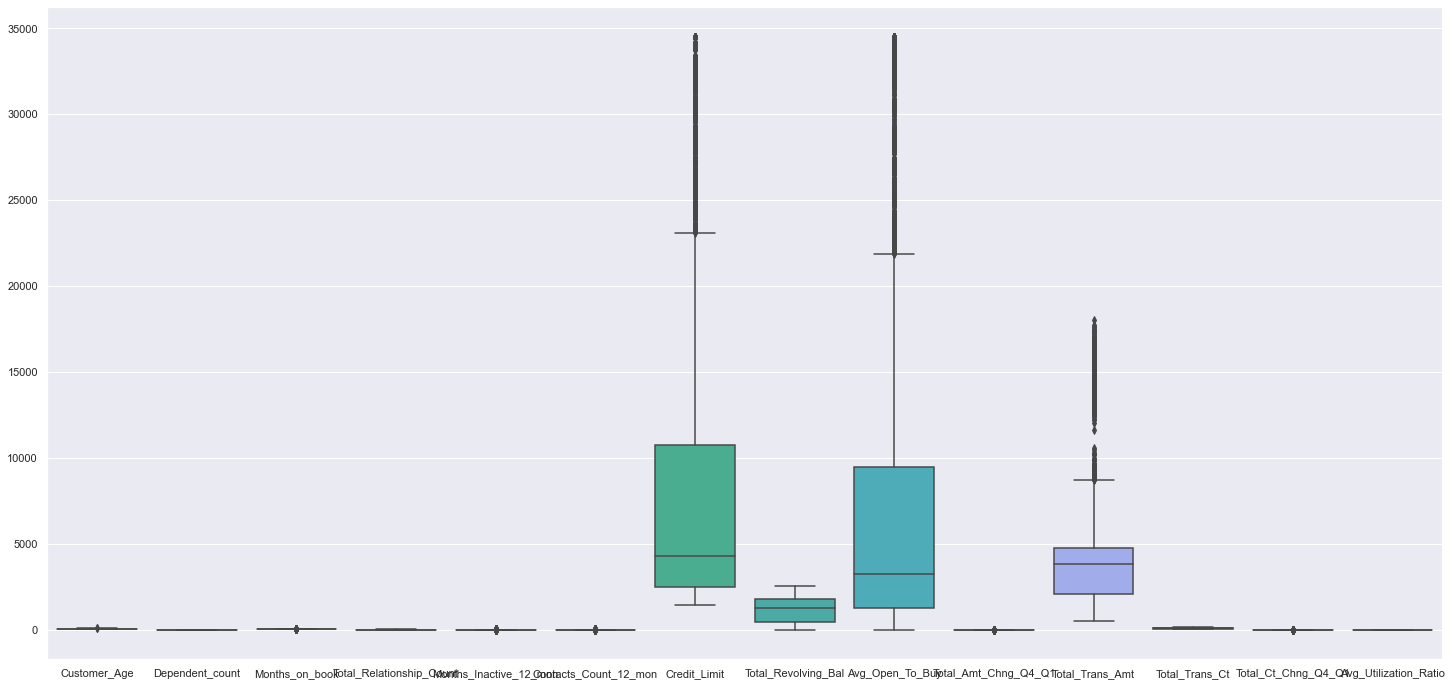

In [38]:
#Verification de l'échelle des variable
plt.figure(figsize=(25,12))
sns.boxplot(data=df_quanti)
plt.show()

In [39]:
#df_quanti['Credit_Limit'],fitted_lmda = stats.boxcox(df_quanti['Credit_Limit'],lmbda=None)
#df_quanti['Total_Trans_Amt'],fitted_lmda = stats.boxcox(df_quanti['Total_Trans_Amt'],lmbda=None)
#df_quanti['Avg_Open_To_Buy'],fitted_lmda = stats.boxcox(df_quanti['Avg_Open_To_Buy'],lmbda=None)

In [40]:
#sns.boxplot(data=df_quanti['Credit_Limit'])

* Normalisation des Variable quatitatives

In [41]:
normaliser = StandardScaler()
df_quanti[df_quanti.columns] = normaliser.fit_transform(df_quanti)
df_quanti

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.167610,0.512710,0.377234,0.764487,-1.349309,0.493777,0.460058,-0.480760,0.502567,2.574433,-0.937167,-0.945214,3.827331,-0.794057
1,0.329862,2.061228,1.002074,1.412015,-1.349309,-0.411332,-0.025947,-0.373652,0.007308,3.497689,-0.894783,-1.323244,12.579779,-0.636187
2,0.578598,0.512710,0.002330,0.116959,-1.349309,-2.221550,-0.556114,-1.437353,-0.427933,8.217051,-0.722936,-1.869287,6.793694,-1.012921
4,-0.789449,0.512710,-1.872192,0.764487,-1.349309,-2.221550,-0.413874,-1.437353,-0.285773,6.339166,-1.031741,-1.533260,7.493388,-1.012921
5,-0.291978,-0.261549,0.002330,-0.530569,-1.349309,-0.411332,-0.491240,0.097873,-0.499670,2.758188,-0.953314,-1.701273,0.563494,0.102927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,0.951702,-1.035808,-0.247607,0.764487,-0.344317,-2.221550,0.596928,1.159112,0.493477,-0.450798,3.224337,2.079024,0.178034,-0.471142
10121,1.200438,-1.035808,1.751883,0.116959,-1.349309,1.398886,-0.526526,-0.691285,-0.464732,-0.854163,2.941483,2.331044,0.333056,-0.424499
10122,0.454230,-0.261549,0.502202,-0.530569,-0.344317,0.493777,-0.492007,0.841479,-0.566588,-0.258080,3.195216,2.205034,0.609581,0.644706
10124,-0.291978,-1.035808,0.002330,0.764487,0.660674,1.398886,-0.337932,-1.437353,-0.209874,0.261812,1.700211,-0.189154,0.446180,-1.012921


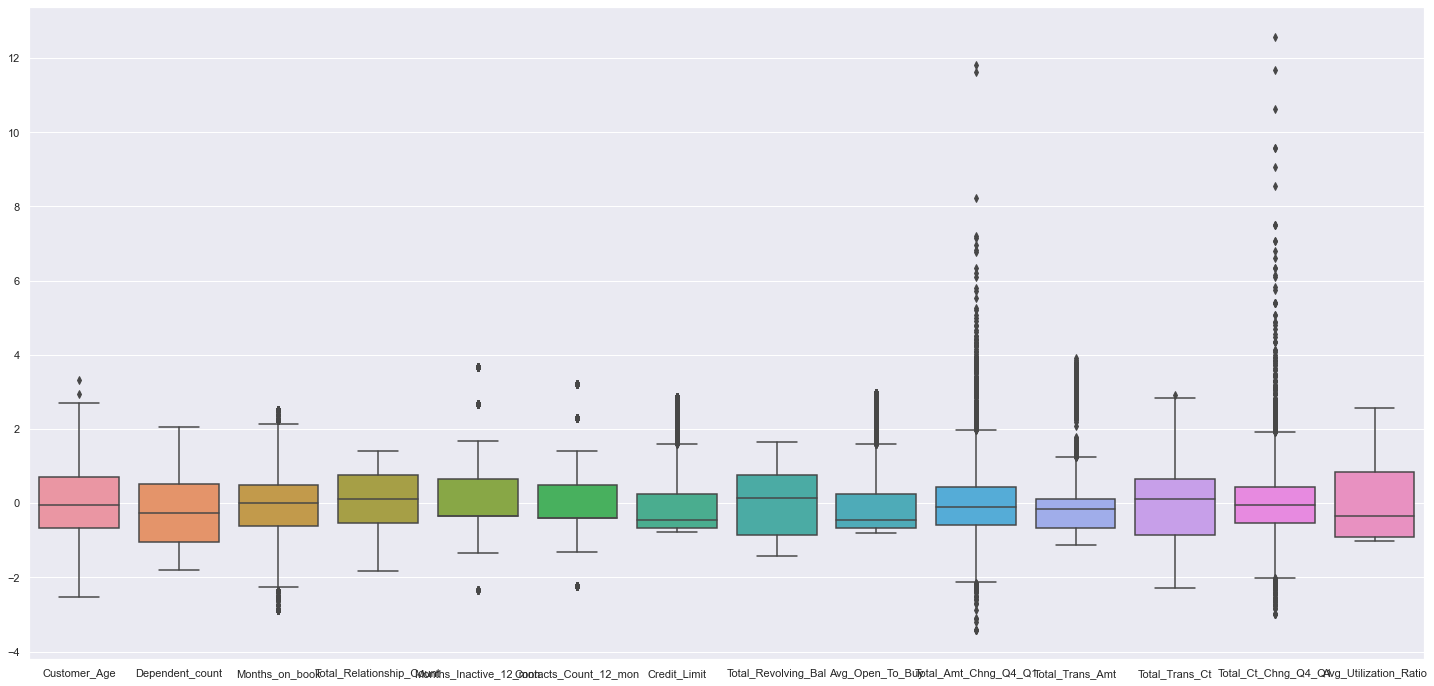

In [42]:
plt.figure(figsize=(25,12))
sns.boxplot(data=df_quanti)
plt.show()

- Assemblage du Dataset

In [43]:
datas = pd.concat([df_quali_nom,data['Card_Category'],\
                   data['Income_Category'],data['Education_Level'],\
                   df_quanti],axis=1)
datas

,Gender_M,Marital_Status_Married,Marital_Status_Single,Card_Category,Income_Category,Education_Level,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,0,0,3,2,-0.167610,0.512710,0.377234,0.764487,-1.349309,0.493777,0.460058,-0.480760,0.502567,2.574433,-0.937167,-0.945214,3.827331,-0.794057
1,0,0,1,0,0,3,0.329862,2.061228,1.002074,1.412015,-1.349309,-0.411332,-0.025947,-0.373652,0.007308,3.497689,-0.894783,-1.323244,12.579779,-0.636187
2,1,1,0,0,2,3,0.578598,0.512710,0.002330,0.116959,-1.349309,-2.221550,-0.556114,-1.437353,-0.427933,8.217051,-0.722936,-1.869287,6.793694,-1.012921
4,1,1,0,0,3,0,-0.789449,0.512710,-1.872192,0.764487,-1.349309,-2.221550,-0.413874,-1.437353,-0.285773,6.339166,-1.031741,-1.533260,7.493388,-1.012921
5,1,1,0,0,1,3,-0.291978,-0.261549,0.002330,-0.530569,-1.349309,-0.411332,-0.491240,0.097873,-0.499670,2.758188,-0.953314,-1.701273,0.563494,0.102927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,1,0,1,0,3,2,0.951702,-1.035808,-0.247607,0.764487,-0.344317,-2.221550,0.596928,1.159112,0.493477,-0.450798,3.224337,2.079024,0.178034,-0.471142
10121,0,0,1,0,0,3,1.200438,-1.035808,1.751883,0.116959,-1.349309,1.398886,-0.526526,-0.691285,-0.464732,-0.854163,2.941483,2.331044,0.333056,-0.424499
10122,1,0,1,0,1,3,0.454230,-0.261549,0.502202,-0.530569,-0.344317,0.493777,-0.492007,0.841479,-0.566588,-0.258080,3.195216,2.205034,0.609581,0.644706
10124,0,1,0,0,0,2,-0.291978,-1.035808,0.002330,0.764487,0.660674,1.398886,-0.337932,-1.437353,-0.209874,0.261812,1.700211,-0.189154,0.446180,-1.012921


- Creation des Variables X et y

In [44]:
X = datas
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=5)

# 3 - Modèlisation

- Support Vector Classifier

In [45]:
model_svc = LinearSVC(random_state=5)
model_svc.fit(X_train,y_train)

LinearSVC(random_state=5)

- Affichage des Scores du SVM

In [46]:
train_score = model_svc.score(X_train, y_train)
test_score = model_svc.score(X_test, y_test)
print('Train Score :', train_score)
print('Test Score :', test_score)

Train Score : 0.9057707828894269
Test Score : 0.8983529411764706


- Rapport de Calssification

In [47]:
y_pred = model_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61       330
           1       0.91      0.97      0.94      1795

    accuracy                           0.90      2125
   macro avg       0.84      0.74      0.77      2125
weighted avg       0.89      0.90      0.89      2125



- Courbe d'Apprentissage

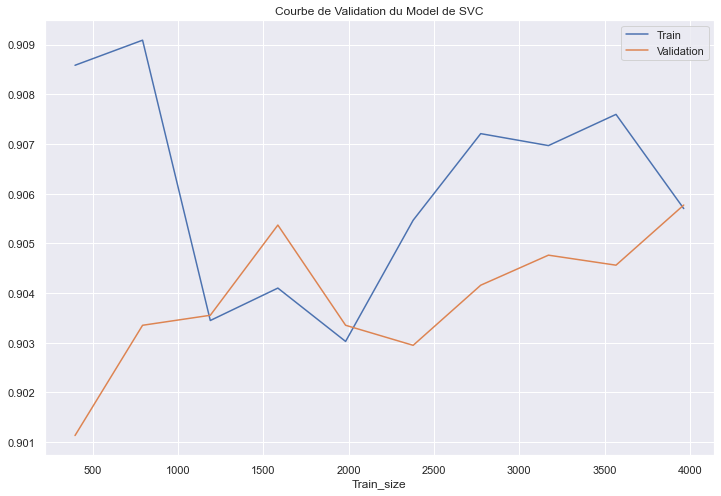

In [48]:
var, train_score, val_score = learning_curve(model_svc,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation du Model de SVC')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

- RandomForest

In [49]:
model_rfc = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=5)
model_rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=5)

- Affichage des Scores du RandomForestClassifier

In [50]:
train_sc = model_rfc.score(X_train, y_train)
test_sc = model_rfc.score(X_test, y_test)
print('Train Score :', train_sc)
print('Test Score :', test_sc)

Train Score : 0.9277643260694108
Test Score : 0.908235294117647


- Rapport de Classification

In [51]:
y_predict = model_rfc.predict(X_test)

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.48      0.62       330
           1       0.91      0.99      0.95      1795

    accuracy                           0.91      2125
   macro avg       0.89      0.73      0.78      2125
weighted avg       0.91      0.91      0.90      2125



- Courbe d'Apprentissage

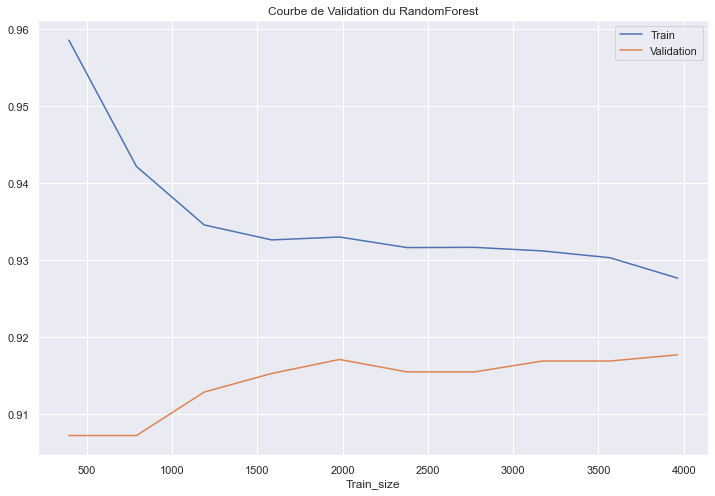

In [53]:
var, train_score, val_score = learning_curve(model_rfc,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation du RandomForest')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

* KNeighborsClassifier

In [62]:
model_kn = KNeighborsClassifier(n_neighbors=5)
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

* Affichage du Score du Model de KNeighbors

In [63]:
train_s = model_kn.score(X_train, y_train)
test_s = model_kn.score(X_test,y_test)
print('Score d\'entrainement : ',train_s)
print('Score de test :',test_s)

Score d'entrainement :  0.9299838579499596
Score de test : 0.9021176470588236


* Rapport de Classification

In [65]:
y_pre = model_kn.predict(X_test)
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.82      0.48      0.60       330
           1       0.91      0.98      0.94      1795

    accuracy                           0.90      2125
   macro avg       0.86      0.73      0.77      2125
weighted avg       0.90      0.90      0.89      2125



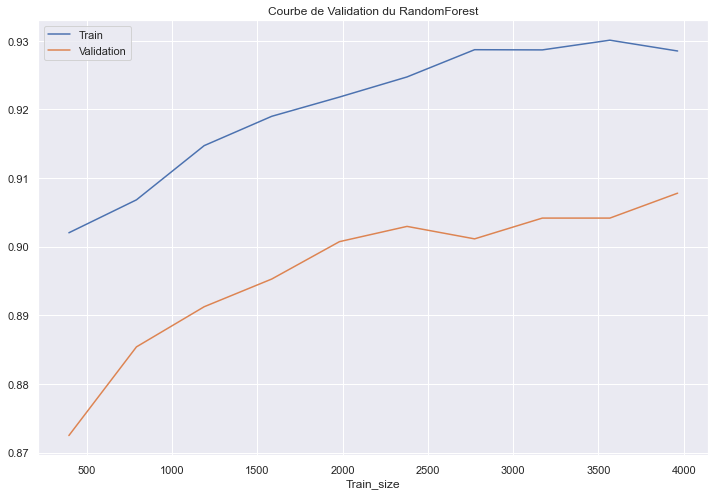

In [66]:
var, train_score, val_score = learning_curve(model_kn,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('Courbe de Validation du RandomForest')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()